<a href="https://colab.research.google.com/github/will-mccormack/CS-M148-Proj/blob/main/Week_2_Spotify_Data_Cleaning_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install scikit-lego

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.3/227.3 kB 4.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import time
import plotly.express as px
import plotly.graph_objects as go

We are studying what parameters have the most impact on popularity score, and we want to find out if we can use the characteristics of a song to predict its popularity. This dataset has quantitatively scored songs from Spotify, and breaks down the songs characteristics into quantitative numbers. These data points will be our predictor variables, and popularity will be our response variable. We wish to build a model that can help song artists predict whether a song will be popular or not

In [6]:
raw_data = pd.read_csv("https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset/resolve/main/dataset.csv")

In [ ]:
print(raw_data.columns)

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


In [ ]:
genre_popularity = raw_data.groupby('track_genre')['popularity'].mean().reset_index()
genre_popularity = genre_popularity.sort_values('popularity', ascending=False)

fig = px.bar(genre_popularity, x='track_genre', y='popularity', title='Average Popularity by Genre')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

By inspect this plot, we can see that popularity score can vary widely and genre likely has a strong impact on popularity score.

In [ ]:
comedy_tracks_count = raw_data[raw_data['track_genre'] == 'comedy'].shape[0]
print(f"number of tracks in the comedy {comedy_tracks_count}")

comedy_tracks = raw_data[raw_data['track_genre'] == 'comedy']



number of tracks in the comedy 1000


When looking into speechiness values, we found that the highest speechiness tracks were in the comedy genre. Following below is an inspection into the comedy genre and its speechiness.

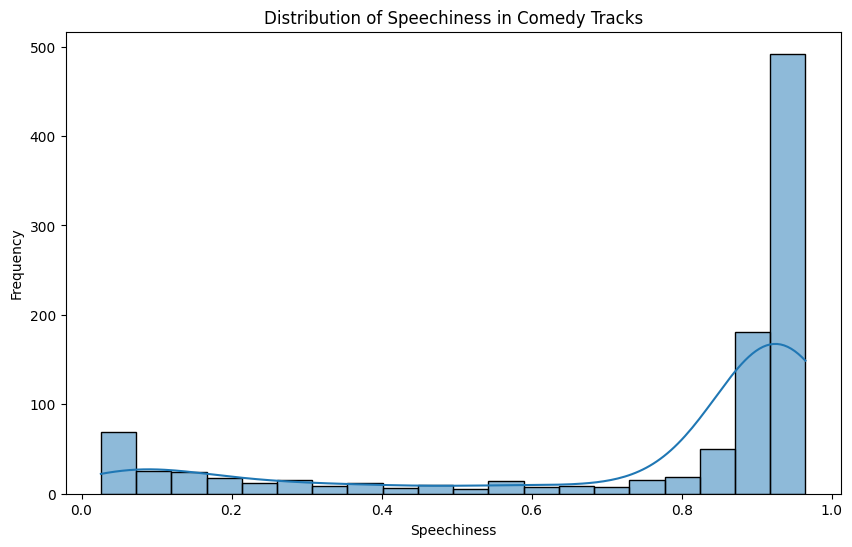

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
18001,18001,6dbSBQXCctYSVryynHXaZ4,Lil Dicky;Chris Brown,Freaky Friday (feat. Chris Brown),Freaky Friday (feat. Chris Brown),45,216631,True,0.755,0.599,...,-5.042,1,0.224,0.1470,0.000000,0.1090,0.755,133.123,4,comedy
18002,18002,7lakl3bPRdQqUGX9m755jX,Lil Dicky,Earth,Earth,40,281500,True,0.694,0.664,...,-4.649,1,0.050,0.6390,0.000000,0.0929,0.676,95.941,4,comedy
18004,18004,5PEleSkK4p4E1sx3x7cOLt,The Lonely Island;Akon,Turtleneck & Chain (Explicit Version),I Just Had Sex,63,166560,True,0.615,0.811,...,-4.316,1,0.144,0.0188,0.000000,0.1960,0.808,167.995,4,comedy
18005,18005,7MkysLvt3L8UFji2PceoFU,Lil Dicky;Brendon Urie,Professional Rapper,Molly (feat. Brendon Urie of Panic at the Disco),66,244339,True,0.829,0.514,...,-6.694,1,0.037,0.2030,0.000157,0.1150,0.397,114.955,4,comedy
18006,18006,1TkWsnheqK0gBtvh07BtNX,Lil Dicky;Fetty Wap;Rich Homie Quan,Professional Rapper,$ave Dat Money (feat. Fetty Wap & Rich Homie Q...,64,290835,True,0.858,0.697,...,-5.361,1,0.230,0.1140,0.000000,0.2240,0.364,98.013,4,comedy


In [ ]:
comedy_tracks = raw_data[raw_data['track_genre'] == 'comedy']

plt.figure(figsize=(10, 6))
sns.histplot(comedy_tracks['speechiness'], kde=True, bins=20)
plt.title('Distribution of Speechiness in Comedy Tracks')
plt.xlabel('Speechiness')
plt.ylabel('Frequency')
plt.show()

comedy_tracks[comedy_tracks['speechiness'] < 0.3].head(5)

We can see that not all comedy genre tracks are over the 0.66 speechiness threshold, but a large majority of comedy tracks have a high speechiness value. Looking into the tracks with low speechiness, we can see that they are legitimate songs. Therefore, we can only remove comedy tracks with high speechienss scores, and not all comedy tracks

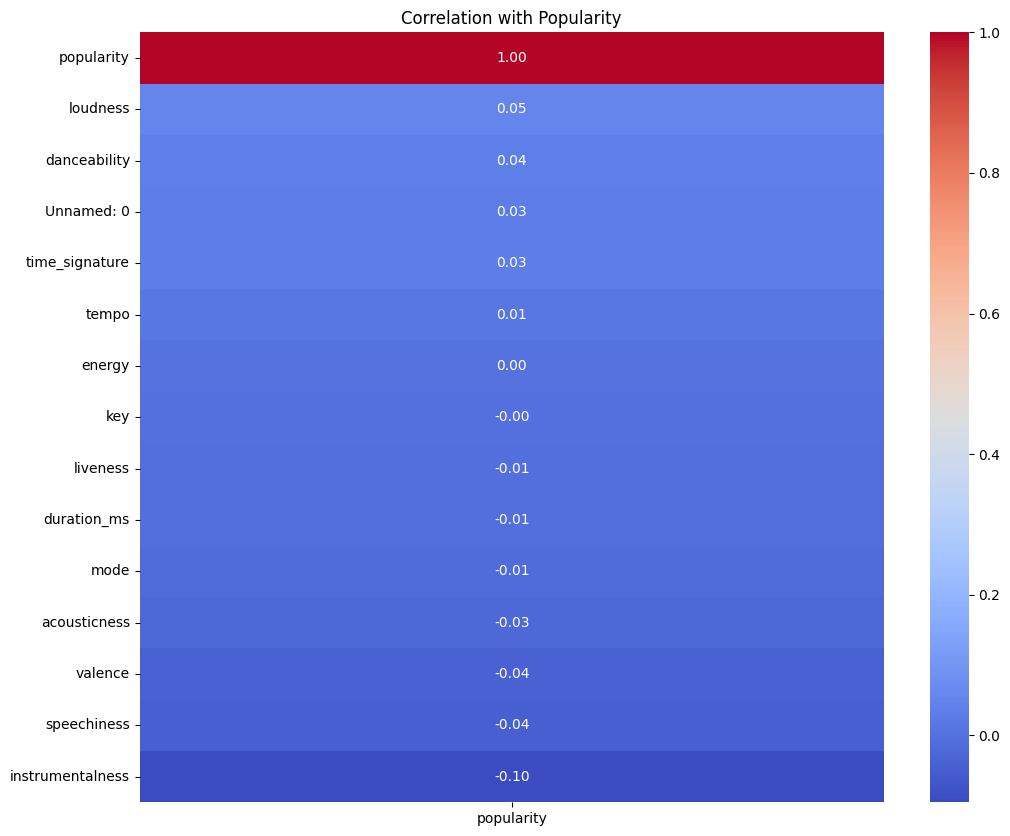

In [ ]:
import seaborn as sns

numerical_cols = raw_data.select_dtypes(include=np.number).columns.tolist()

correlation_matrix = raw_data[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['popularity']].sort_values(by='popularity', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Popularity')
plt.show()

Looking into the correlation of numerical values and the correlation with popularity, we can see instrumentalness has a very low correlation by itself with popularity. When inspecting what "instrumentalness" means, we have decided to remove instrumentalness from our dataset since we don't believe that instrumentalness will be a good predictor for our dependent variable.

In [ ]:

missing_values = raw_data.isnull().sum()

missing_percentage = (missing_values / len(raw_data)) * 100

missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

display(missing_info)

,Missing Values,Percentage
Unnamed: 0,0,0.000000
track_id,0,0.000000
artists,1,0.000877
album_name,1,0.000877
track_name,1,0.000877
popularity,0,0.000000
duration_ms,0,0.000000
explicit,0,0.000000
danceability,0,0.000000
energy,0,0.000000


We can see that very few rows are missing data from columns. We will remove these few rows to clean our data

In [8]:
cleaned_data = raw_data.dropna()

drop_columns = ['track_id', 'instrumentalness', 'Unnamed: 0']
cleaned_data = cleaned_data.drop(columns=drop_columns)

display(cleaned_data.head(5))

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.0829,0.167,119.949,4,acoustic


The column name speechiness interested us. We know that sometimes spotify has podcasts or talk shows, and since we are primarily concerned with predicting song popularity, we don't want talk show based entries to pollute our dataset. To check if such entries exist in the dataset, we will find the top ten songs with the most speechiness and check on spotify if these are comedy shows or not

In [9]:
cleaned_data.nlargest(10, "speechiness")

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,time_signature,track_genre
18152,Tenacious D,Post-Apocalypto,turd whistle,26,39426,True,0.630,0.249,4,-14.952,1,0.965,0.353,0.193,0.739,172.243,3,comedy
18504,Tom Papa,Human Mule,The Real World,22,68758,False,0.537,0.548,5,-15.100,0,0.963,0.736,0.745,0.730,179.403,3,comedy
18530,Patton Oswalt,Talking for Clapping,Less and Less Radical,23,207619,True,0.650,0.461,7,-18.317,1,0.963,0.848,0.732,0.365,50.324,4,comedy
18137,Dan Cummins,Get Outta Here; Devil!,Get Rid of That Joke!,25,191399,True,0.604,0.619,5,-13.426,1,0.962,0.682,0.860,0.562,88.668,3,comedy
18227,Patton Oswalt,Talking for Clapping,Parents and Pills,25,202358,True,0.552,0.431,10,-18.837,1,0.962,0.872,0.674,0.448,78.361,4,comedy
18432,Robert Schimmel,Life Since Then,Chemotherapy,22,132520,True,0.599,0.369,6,-20.816,1,0.962,0.921,0.696,0.494,83.026,5,comedy
18663,Tom Papa,Human Mule,The Human Contract,21,339521,False,0.617,0.592,2,-13.854,1,0.962,0.721,0.752,0.465,90.721,4,comedy
18666,Tom Papa,Human Mule,Angry Young Men,21,136820,False,0.587,0.558,11,-14.645,0,0.962,0.795,0.807,0.559,88.127,4,comedy
18674,Tom Papa,Human Mule,Morning Tom,21,213995,False,0.526,0.667,6,-15.417,1,0.962,0.772,0.751,0.259,171.074,4,comedy
18067,Robert Schimmel,Life Since Then,Non Hogkins Lymphoma,28,68520,True,0.689,0.332,2,-19.407,1,0.961,0.873,0.660,0.701,80.739,4,comedy


Checking the found entries, we see that these indeed are comedy shows. We want to check to see if all entries with the genre "comedy" are talk shows, because if they are we can simply remove all entries labeled comedy



In [10]:
lowest_speechy_comedies = cleaned_data[cleaned_data['track_genre'] == 'comedy'].nsmallest(10, "speechiness")
lowest_speechy_comedies

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,time_signature,track_genre
18783,Steve Martin;Steep Canyon Rangers;Paul McCartney,Rare Bird Alert,Best Love,22,261640,False,0.655,0.486,9,-10.748,1,0.0258,0.7850,0.0854,0.802,104.997,4,comedy
18838,Steve Martin;Steep Canyon Rangers,Rare Bird Alert,"Go Away, Stop, Turn Around, Come Back",21,215573,False,0.522,0.601,9,-8.812,1,0.0278,0.6670,0.1470,0.674,107.244,4,comedy
18826,"""Weird Al"" Yankovic",Polka Party,Good Enough for Now,22,183333,False,0.661,0.412,3,-13.015,1,0.0291,0.0475,0.2090,0.855,130.758,4,comedy
18526,Stephen Lynch,A Little Bit Special,HermAphrodite,23,169213,True,0.483,0.424,0,-7.724,1,0.0292,0.4980,0.1000,0.256,114.717,4,comedy
18396,Linda P,Just Divorced,Støttesang til Realititydeltagerne,24,241938,False,0.552,0.623,1,-5.303,1,0.0294,0.1670,0.0842,0.395,75.030,4,comedy
18529,Jason Manford,A Different Stage,"This Is The Moment - From ""Jekyll And Hyde""",23,219240,False,0.399,0.223,5,-11.461,1,0.0298,0.5940,0.0650,0.117,66.532,4,comedy
18606,Stephen Lynch,My Old Heart,My Old Heart,22,314480,True,0.668,0.203,4,-10.825,1,0.0298,0.8890,0.1040,0.217,138.812,4,comedy
18524,Steve Martin;Steep Canyon Rangers,Rare Bird Alert,More Bad Weather On The Way,22,211960,False,0.549,0.545,5,-9.162,1,0.0299,0.8010,0.1350,0.910,127.129,4,comedy
18379,Stephen Lynch,A Little Bit Special,Gerbil,24,184413,True,0.640,0.343,9,-8.999,0,0.0300,0.6780,0.1330,0.406,109.854,4,comedy
18577,Stephen Lynch,3 Balloons,You (Prettier Than),22,176080,False,0.535,0.261,9,-10.932,1,0.0305,0.3970,0.1240,0.373,130.518,4,comedy


We see that there are in fact some comedy songs that aren't sets. What this tells us is that for the comedy genre at least, speechiness is accurate and is not making mistakes by having comedy songs have low speechiness values. These songs accurately are comedy and have low speechiness values. This means that as a next step, we can probably find an acceptible max for speechiness and filter out all entries above that to remove podcast type entries.